In [1]:
import drawsvg as dw
%load_ext jhmagics

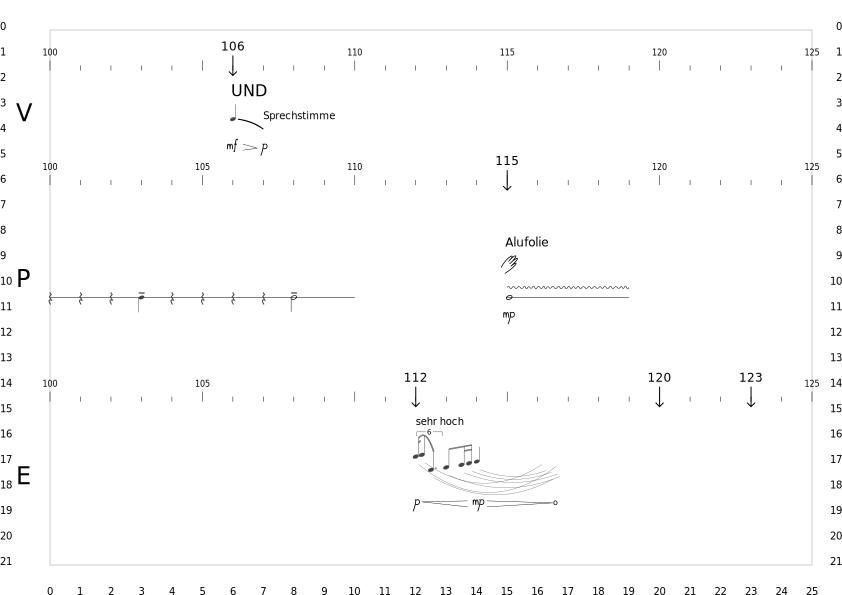

In [41]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
showGridOnMargins()
showWritingSpace()

# zeitleisten und instrumente links
tm0 = 100  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[100,110,115,120,125],[100,105,110,120,125],[100,105,125]]
 # events in V P E
event = [[106],[115],[112,120,123]]
 # ygrid positionen für die leisten
yleisten = [1,5.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.5)
        else: vline(x,y+off,-5,sw=.5)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,8,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # und
x = xg(106)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('UND',x-2,yg(ygindxtext),16)
y = yg(ygindxvtop+1.7)
not4tel(x,y,nothals,notsiz)
glisscurve(x+5,y,xg(107),y+10)
text('Sprechstimme',xg(107),y,10,font_family='Cantarell Light',font_style='italic')
yy = y+30
mezzoforte(x-2,yy,dynsiz)
piano(x+xunit,yy,dynsiz)
dim(x+10,yy-2,x+xunit*.8,yy-1,6)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yltam = ypercindx+5
ylalu = ypercindx+5
startends = [100,110,115,119]
insnamen = ['','Alufolie']
yoffsetins = [2,2] #abstand der namen von den linien
for i,yl in enumerate([yltam,ylalu]):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    
 # tamtam
y = yg(yltam)
paus4tel(xg(100),y,pausiz,1.5)
paus4tel(xg(101),y,pausiz,1.5)
paus4tel(xg(102),y,pausiz,1.5)
not4tel(xg(103),y,-nothals,notsiz)
tenuto(xg(103),y,notsiz)
paus4tel(xg(104),y,pausiz,1.5)
paus4tel(xg(105),y,pausiz,1.5)
paus4tel(xg(106),y,pausiz,1.5)
paus4tel(xg(107),y,pausiz,1.5)
not2tel(xg(108),y,-nothals,notsiz)
tenuto(xg(108),y,notsiz)

 # alufolie
x = xg(115)
y = yg(ylalu)
hand(x,y-30)
not2tel(x+2,y,0,notsiz,swfac_head=1.2)
yy = y-10
quasitr(x,yy,xg(119))
mezzopiano(x,y+20,dynsiz)


################# ELEKTRONIK #################

 # 112
x = xg(112)
yschrift = yg(15.5)
text('sehr hoch',x,yschrift,10,font_family='Cantarell Light',font_style='italic')
pch_112 = [81.66,82,79,79.5,80,80.33,80.66] #midi pitches
y = yschrift+30 # höhe tiefste note
y1,y2,y3,y4,y5,y6,y7 = [(82-i)*5+y for i in pch_112]
x1,x2,x3,x4,x5,x6,x7 = [xg(i) for i in (112,112.2,112.5,113,113.5,113.75,114)]
gruppe([x1,y1,x2,y2,x3,y3],[2,1,1],[0,0,1],y_space=notsiz,cp_y_shift=1)
yy = yschrift+7
nlet(x,yy,x+xunit*.9,yy,text='6')
gruppe([x4,y4,x5,y5,x6,y6],[1,2,2],y_space=notsiz)
not4tel(x7,y7,nothals,notsiz)
xd,yd = 3,8
from random import uniform
for x,y,z in zip((x1,x2,x3,x4,x5,x6,x7),(y1,y2,y3,y4,y5,y6,y7),(2,1.7,1.4,1.1,1,1,1)):
    tie(x+xd,y+yd,xg(116)+uniform(0,xunit),y+yd+z,z,.3,thick=0,c='#555')
yy = yschrift+80
piano(xg(112),yy,dynsiz)
mezzopiano(xg(114),yy,dynsiz)
text('o',xg(116.5),yy,8,font_family='Cantarell',font_style='italic')
cresc(xg(112.2),yy-3,xg(113.7),yy-1,6)
dim(xg(114)+10,yy-1,xg(116.5),yy-2,6)


#d.set_pixel_scale(2)
#d.save_png('partitur_05.png')
#d.save_svg('partitur_05.svg')
d

In [8]:
help(tie)

Help on function tie in module __main__:

tie(x=10, y=90, xend=100, yend=10, dir=1, sw=1, c='black', **args)
    tie (haltebogen) between two notes
    dir=1 means bowing downwards, dir=1 upwards
    larger number means more bowing
    thick results in the thickness

